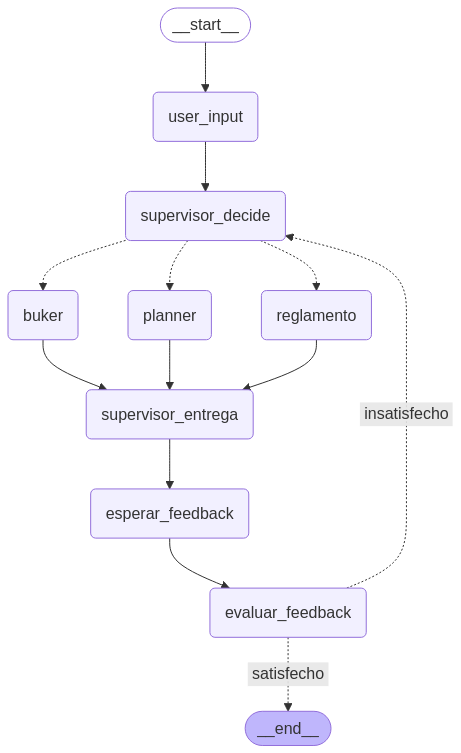

In [2]:
from langgraph.graph import StateGraph, END, START
from langchain_core.runnables import RunnableLambda
from IPython.display import display, Image

# Estado mínimo
class GlobalState(dict):
    pass

# Nodos vacíos
def placeholder_node(state):
    pass

# Condicional: supervisor elige agente (simulado)
def decidir_agente(state):
    return "planner"  # Puedes probar con: "buker", "reglamento"

# Condicional para feedback del usuario
def evaluar_satisfaccion(state):
    return "satisfecho"  # o "insatisfecho"

# Wrappers como Runnables
user_input = RunnableLambda(placeholder_node)
supervisor_decide = RunnableLambda(decidir_agente)
agent_buker = RunnableLambda(placeholder_node)
agent_planner = RunnableLambda(placeholder_node)
agent_reglamento = RunnableLambda(placeholder_node)
supervisor_entrega = RunnableLambda(placeholder_node)
esperar_feedback = RunnableLambda(placeholder_node)
evaluar_feedback = RunnableLambda(evaluar_satisfaccion)

# Crear grafo
graph = StateGraph(GlobalState)

# Añadir nodos
graph.add_node("user_input", user_input)
graph.add_node("supervisor_decide", supervisor_decide)
graph.add_node("buker", agent_buker)
graph.add_node("planner", agent_planner)
graph.add_node("reglamento", agent_reglamento)
graph.add_node("supervisor_entrega", supervisor_entrega)
graph.add_node("esperar_feedback", esperar_feedback)
graph.add_node("evaluar_feedback", evaluar_feedback)

# Flujo
graph.add_edge(START, "user_input")
graph.add_edge("user_input", "supervisor_decide")

# Supervisor decide agente
graph.add_conditional_edges(
    "supervisor_decide",
    decidir_agente,
    {
        "buker": "buker",
        "planner": "planner",
        "reglamento": "reglamento"
    }
)

# Todos los agentes vuelven al supervisor
graph.add_edge("buker", "supervisor_entrega")
graph.add_edge("planner", "supervisor_entrega")
graph.add_edge("reglamento", "supervisor_entrega")

# Supervisor pregunta por feedback
graph.add_edge("supervisor_entrega", "esperar_feedback")
graph.add_edge("esperar_feedback", "evaluar_feedback")

# Evaluar feedback
graph.add_conditional_edges(
    "evaluar_feedback",
    evaluar_satisfaccion,
    {
        "satisfecho": END,
        "insatisfecho": "supervisor_decide"
    }
)


# Compilar grafo
graph = graph.compile()
# Mostrar visualización del grafo
display(Image(graph.get_graph().draw_mermaid_png()))
